# Loan Application Screening

### Installing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Understanding Data Set Given

In [2]:
df = pd.read_csv('loan_dataset_final.csv', encoding = "ISO-8859-1")

In [3]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,home_ownership,...,collections_12_mths_ex_med,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,race_name,gender
0,1000007,1225615,5150,5150,5150.0,60 months,132.58,atlantic tomorrows office,1 year,RENT,...,0.0,1.0,0.1864,0.8730,2,709,0.147176,124.0,White,Female
1,1000030,1225638,20000,20000,20000.0,36 months,635.07,The Red Threads Inc.,6 years,RENT,...,0.0,0.0,0.0890,0.3540,0,744,0.277778,149.0,African American,Female
2,1000033,1225642,12800,12800,12750.0,60 months,316.54,T-Mobile USA Inc,9 years,MORTGAGE,...,0.0,0.0,0.1677,0.7540,0,719,0.156655,176.0,White,Female
3,1000045,1225655,14000,14000,14000.0,60 months,349.98,Trader Joe's,9 years,MORTGAGE,...,0.0,0.0,0.1727,0.3570,0,714,0.194444,140.0,White,Female
4,1000067,1225680,15000,15000,14975.0,60 months,370.94,Truevance Engineering,< 1 year,RENT,...,0.0,0.0,0.1677,0.3690,0,709,0.208333,136.0,White,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,999250,1224611,10000,10000,10000.0,36 months,339.31,County of San Bernardino,3 years,MORTGAGE,...,0.0,0.0,0.1349,0.3180,0,674,0.333333,19.0,Asian,Female
42531,999295,1224664,9600,9600,9600.0,36 months,341.17,LA CURACAO,5 years,RENT,...,0.0,0.0,0.1677,0.0087,0,679,0.213333,16.0,White,Male
42532,999634,1225015,1200,1200,1200.0,36 months,39.70,The Home Depot,3 years,RENT,...,0.0,0.0,0.1171,0.5270,2,689,0.060000,17.0,White,Female
42533,999763,1225141,8000,8000,8000.0,60 months,179.66,Law Office of Melissa Betancourt,4 years,RENT,...,0.0,0.0,0.1242,0.3340,0,749,0.210526,55.0,Asian,Female


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,home_ownership,...,collections_12_mths_ex_med,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,race_name,gender
0,1000007,1225615,5150,5150,5150.0,60 months,132.58,atlantic tomorrows office,1 year,RENT,...,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,White,Female
1,1000030,1225638,20000,20000,20000.0,36 months,635.07,The Red Threads Inc.,6 years,RENT,...,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,African American,Female
2,1000033,1225642,12800,12800,12750.0,60 months,316.54,T-Mobile USA Inc,9 years,MORTGAGE,...,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,White,Female
3,1000045,1225655,14000,14000,14000.0,60 months,349.98,Trader Joe's,9 years,MORTGAGE,...,0.0,0.0,0.1727,0.357,0,714,0.194444,140.0,White,Female
4,1000067,1225680,15000,15000,14975.0,60 months,370.94,Truevance Engineering,< 1 year,RENT,...,0.0,0.0,0.1677,0.369,0,709,0.208333,136.0,White,Female


In [5]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,home_ownership,...,collections_12_mths_ex_med,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,race_name,gender
42530,999250,1224611,10000,10000,10000.0,36 months,339.31,County of San Bernardino,3 years,MORTGAGE,...,0.0,0.0,0.1349,0.3180,0,674,0.333333,19.0,Asian,Female
42531,999295,1224664,9600,9600,9600.0,36 months,341.17,LA CURACAO,5 years,RENT,...,0.0,0.0,0.1677,0.0087,0,679,0.213333,16.0,White,Male
42532,999634,1225015,1200,1200,1200.0,36 months,39.70,The Home Depot,3 years,RENT,...,0.0,0.0,0.1171,0.5270,2,689,0.060000,17.0,White,Female
42533,999763,1225141,8000,8000,8000.0,60 months,179.66,Law Office of Melissa Betancourt,4 years,RENT,...,0.0,0.0,0.1242,0.3340,0,749,0.210526,55.0,Asian,Female
42534,999816,1225200,16000,16000,15950.0,60 months,382.92,champlain coummunity services,1 year,MORTGAGE,...,0.0,0.0,0.1527,0.7640,1,694,0.288101,55.0,White,Female


In [6]:
df.shape

(42535, 47)

In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'installment', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'interest_rate',
       'revol_utilization', 'number_bc_gt_75', 'fico_score', 'lti',
       'month_since_oldest_tl', 'race_name', 'gender'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42535 non-null  int64  
 1   member_id                   42535 non-null  int64  
 2   loan_amnt                   42535 non-null  int64  
 3   funded_amnt                 42535 non-null  int64  
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   installment                 42535 non-null  float64
 7   emp_title                   39909 non-null  object 
 8   emp_length                  41423 non-null  object 
 9   home_ownership              42535 non-null  object 
 10  annual_inc                  42531 non-null  float64
 11  verification_status         42535 non-null  object 
 12  issue_d                     42535 non-null  object 
 13  loan_status                 425

In [9]:
def get_value_counts(df):
    value_counts_dict = {}
    for column in df.columns:
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            value_counts_dict[column] = df[column].value_counts(dropna=False)  # include NaN values
        else:
            value_counts_dict[column] = df[column].value_counts(bins=10, dropna=False)  # for numerical features, binning the data
    return value_counts_dict

# Get value counts for all features
value_counts = get_value_counts(df)

# Display the value counts
for feature, counts in value_counts.items():
    print(f"Value counts for {feature}:\n{counts}\n")

Value counts for id:
id
(463840.8, 566117.5]     7679
(566117.5, 668394.2]     7194
(770670.9, 872947.6]     6165
(668394.2, 770670.9]     5774
(975224.3, 1077501.0]    5702
(361564.1, 463840.8]     5250
(872947.6, 975224.3]     2126
(259287.4, 361564.1]     1453
(157010.7, 259287.4]      724
(53711.232, 157010.7]     468
Name: count, dtype: int64

Value counts for member_id:
member_id
(692320.0, 816689.4]      7281
(941058.8, 1065428.2]     6593
(816689.4, 941058.8]      6154
(1189797.6, 1314167.0]    6056
(567950.6, 692320.0]      5985
(443581.2, 567950.6]      2968
(1065428.2, 1189797.6]    2956
(319211.8, 443581.2]      2747
(194842.4, 319211.8]      1119
(69229.305, 194842.4]      676
Name: count, dtype: int64

Value counts for loan_amnt:
loan_amnt
(3950.0, 7400.0]      10716
(7400.0, 10850.0]      8685
(465.499, 3950.0]      5590
(10850.0, 14300.0]     5386
(14300.0, 17750.0]     4386
(17750.0, 21200.0]     3347
(24650.0, 28100.0]     1850
(21200.0, 24650.0]     1288
(31550.0, 35

## Data Cleaning

### Removing Irrelevant Features

In [10]:
df.drop(columns=['id',                          #Doesn't contribute to decision making, it is only useful for record-keeping
                 'member_id',                   #Doesn't contribute to decision making, it is only useful for record-keeping
                 'funded_amnt',                 #won't be available during initial loan application
                 'funded_amnt_inv',             #won't be available during initial loan application
                 'installment',                 #won't be available during initial loan application
                 'emp_title',                   #has high cardinality and inconsistent data entries
                 'issue_d',                     #due to high cardinality, it brings more noise to the model, than predictive power
                 'pymnt_plan',                  # has high data imbalance
                 'desc',                        #has high cardinality and inconsistent data entries
                 'title',                       #has high cardinality and inconsistent data entries
                 'addr_state',                  #has high cardinality and is irrelevant
                 'mths_since_last_delinq',      #redundant since delinq_2yrs gives a recent idea of the customer's credit behaviour
                 'out_prncp',                   #won't be available during initial loan application
                 'out_prncp_inv',               #won't be available during initial loan application
                 'total_pymnt',                 #won't be available during initial loan application
                 'total_pymnt_inv',             #won't be available during initial loan application
                 'total_rec_prncp',             #won't be available during initial loan application
                 'total_rec_int',               #won't be available during initial loan application
                 'total_rec_late_fee',          #won't be available during initial loan application
                 'recoveries',                  #won't be available during initial loan application
                 'collection_recovery_fee',     #won't be available during initial loan application
                 'collections_12_mths_ex_med',   #has only 1 value hence it cannot contribute any variability to the dataset
                 'pub_rec_bankruptcies',        #redundant since pub_rec gives description of the same
                 'interest_rate',               #won't be available during initial loan application
                ], inplace=True)

### Handling Outliers

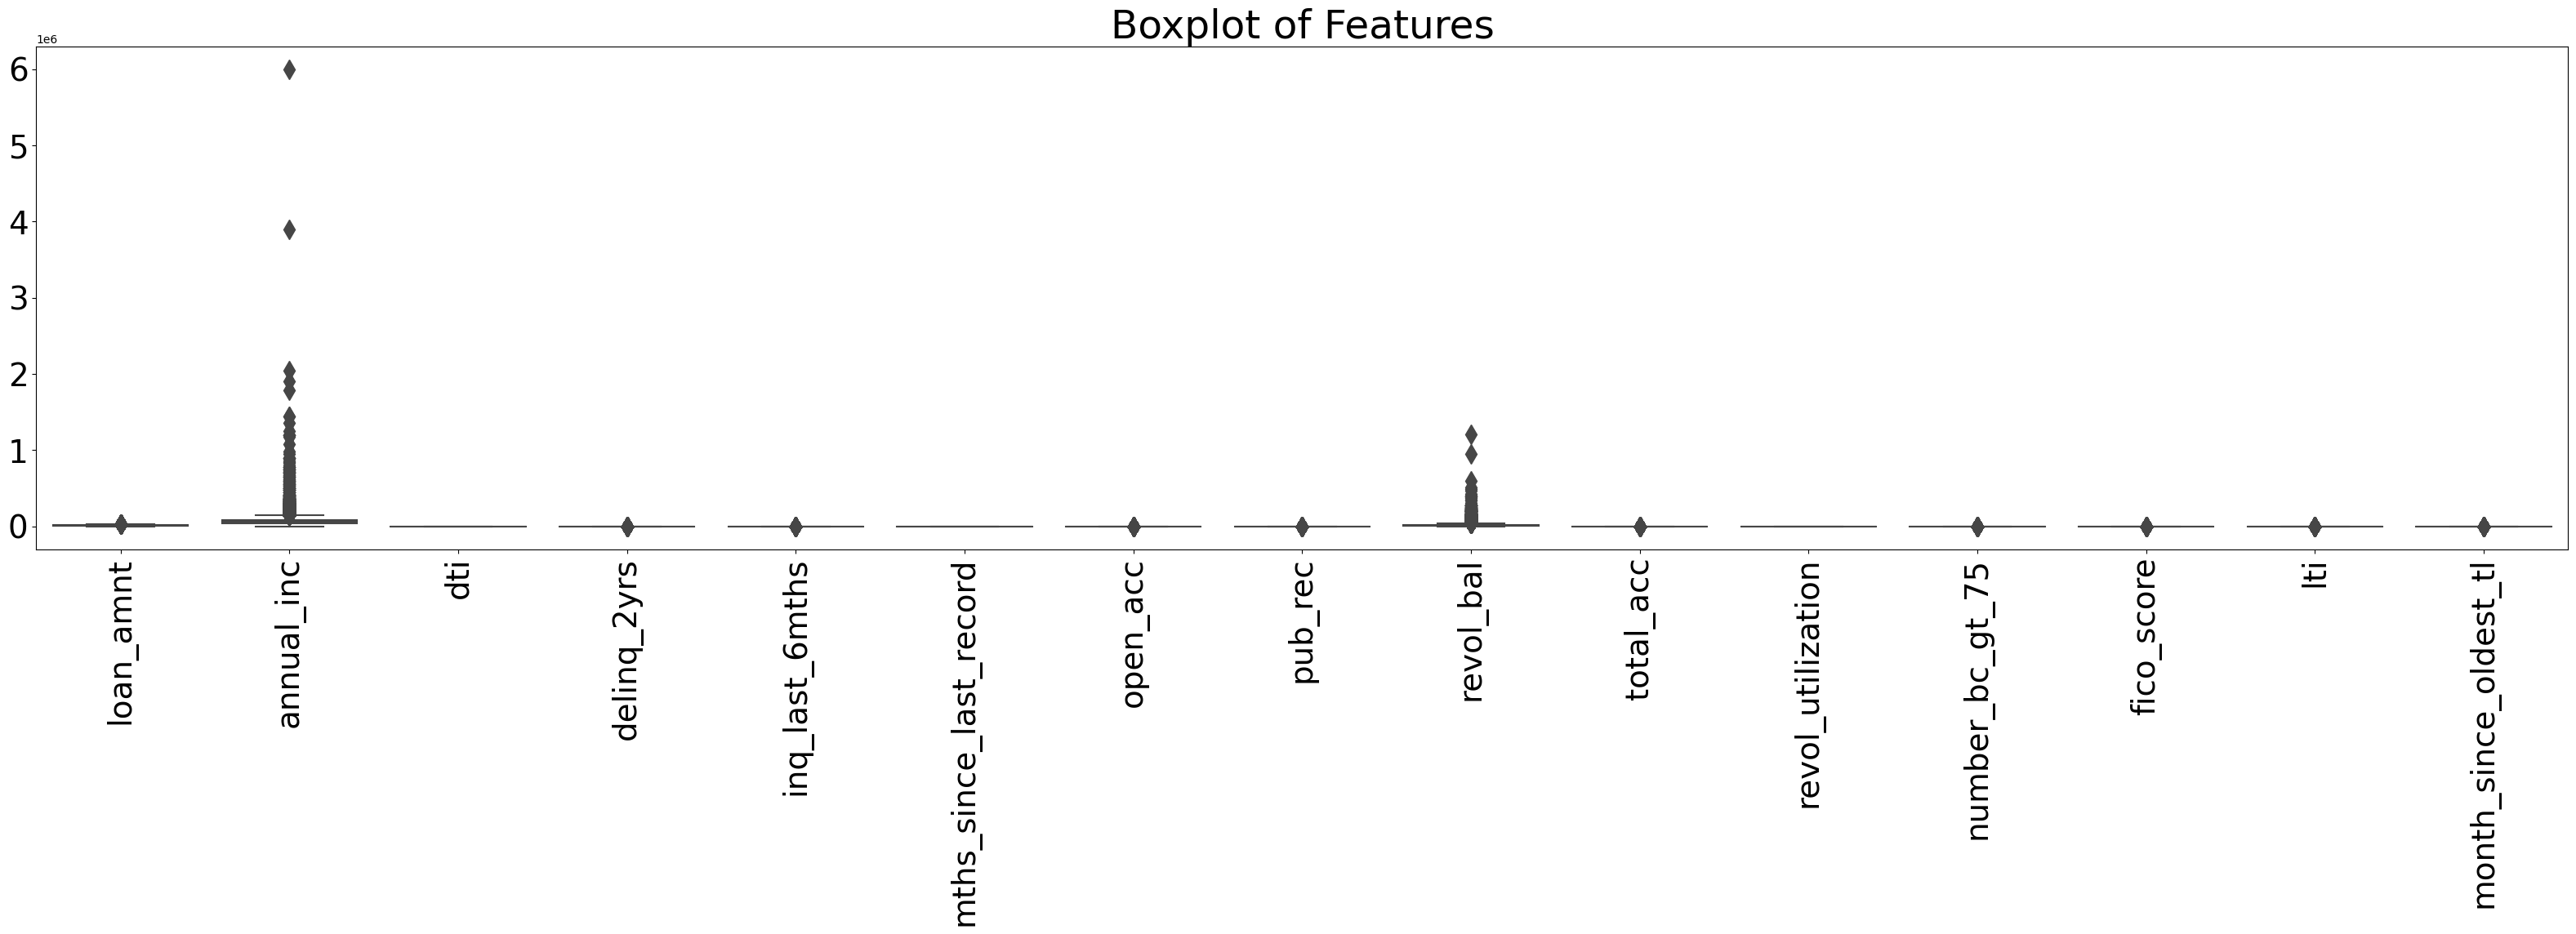

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,8))
sns.boxplot(data = df, fliersize=12)
plt.xticks(rotation=90, fontsize=28)
plt.yticks(fontsize=28)
plt.title('Boxplot of Features', fontsize=35)
plt.show()

### Handling Missing Values

In [1]:
df.isnull().sum()  

NameError: name 'df' is not defined

#### Imputing Numerical Datatype

In [13]:
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median());                                 #imputing with median since feature has outliers
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(df['delinq_2yrs'].median());                              #imputing with median since feature has outliers
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(df['inq_last_6mths'].median());                     #imputing with median since feature has outliers
df['pub_rec'] = df['pub_rec'].fillna(df['pub_rec'].median());                                          #imputing with median since feature has outliers
df['total_acc'] = df['total_acc'].fillna(df['total_acc'].median());                                    #imputing with median since feature has outliers
df['revol_utilization'] = df['revol_utilization'].fillna(df['revol_utilization'].mean());              #imputing with mean since feature does not have outliers
df['lti'] = df['lti'].fillna(df['lti'].median());                                                      #imputing with median since feature has outliers
df['month_since_oldest_tl'] = df['month_since_oldest_tl'].fillna(df['month_since_oldest_tl'].median());#imputing with median since feature has outliers
df['open_acc'] = df['open_acc'].fillna(df['open_acc'].median());                                       #imputing with median since feature has outliers
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(555555555);                         #imputing with an unachievable large value to mark the absence of a public record. If a public record is recent, it's value would be low, but if there is no public record, it should not reflect adversely.

#### Imputing Categorical Datatype

In [14]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0]); ##imputing with mode since it is a categorical feature

In [15]:
df.isnull().sum()

loan_amnt                 0
term                      0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
mths_since_last_record    0
open_acc                  0
pub_rec                   0
revol_bal                 0
total_acc                 0
revol_utilization         0
number_bc_gt_75           0
fico_score                0
lti                       0
month_since_oldest_tl     0
race_name                 0
gender                    0
dtype: int64

### Encoding Categorical Variables To Numerical

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Considering loan_status as target feature, converting it to binary numerical data, i.e. Will Default (1) & Will not Default (0)

print(df['loan_status'].value_counts(), "\n")
binary_mapping = {
    'Fully Paid': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Current': 0,
    'In Grace Period': 0,
    'Charged Off': 1,
    'Does not meet the credit policy. Status:Charged Off': 1,
    'Late (31-120 days)': 1,
    'Late (16-30 days)': 1,
    'Default': 1
}

df['loan_status_binary'] = df['loan_status'].map(binary_mapping)
value_counts = df['loan_status_binary'].value_counts()
value_counts

loan_status
Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: count, dtype: int64 



loan_status_binary
0    36103
1     6432
Name: count, dtype: int64

In [18]:
# Target encoding home_ownership

print(df['home_ownership'].value_counts(), "\n")
df['home_ownership_mean_encoded'] = df.groupby('home_ownership')['loan_status_binary'].transform('mean')
print(df['home_ownership_mean_encoded'].value_counts())

home_ownership
RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: count, dtype: int64 

home_ownership_mean_encoded
0.158862    20181
0.142465    18959
0.152261     3251
0.213235      136
0.125000        8
Name: count, dtype: int64


In [19]:
# Target encoding purpose

print(df['purpose'].value_counts())
df['purpose_mean_encoded'] = df.groupby('purpose')['loan_status_binary'].transform('mean')
print(df['purpose_mean_encoded'].value_counts())

purpose
debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: count, dtype: int64
purpose_mean_encoded
0.155997    19776
0.112653     5477
0.171299     4425
0.132229     3199
0.106015     2311
0.275602     1992
0.107121     1615
0.108566     1004
0.169987      753
0.170111      629
0.164319      426
0.208531      422
0.150000      400
0.188679      106
Name: count, dtype: int64


In [20]:
# Target encoding race_name

print(df['race_name'].value_counts())
df['race_name_encoded'] = df.groupby('race_name')['loan_status_binary'].transform('mean')
print(df['race_name_encoded'].value_counts())

race_name
White               14160
Asian               14149
African American     7118
Other                7108
Name: count, dtype: int64
race_name_encoded
0.150494    14160
0.150046    14149
0.153133     7118
0.153067     7108
Name: count, dtype: int64


In [21]:
# Label Encoding remaining features

cols = ['gender', 'term', 'verification_status']
lb = LabelEncoder()
for col in cols:
    df[col] = lb.fit_transform(df[col])

In [22]:
# Label encoding emp_length

print(df['emp_length'].value_counts())
emp_length_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

df['emp_length_numeric'] = df['emp_length'].map(emp_length_mapping)
print(df['emp_length_numeric'].value_counts())

emp_length
10+ years    10481
< 1 year      5062
2 years       4743
3 years       4364
4 years       3649
1 year        3595
5 years       3458
6 years       2375
7 years       1875
8 years       1592
9 years       1341
Name: count, dtype: int64
emp_length_numeric
10.0    10481
0.5      5062
2.0      4743
3.0      4364
4.0      3649
1.0      3595
5.0      3458
6.0      2375
7.0      1875
8.0      1592
9.0      1341
Name: count, dtype: int64


#### Apply Log Transformation

Skewness of numeric features:
 loan_amnt                       1.064970
term                            1.102458
annual_inc                     29.036200
verification_status             0.241460
dti                            -0.029922
delinq_2yrs                     5.435314
inq_last_6mths                  2.882147
mths_since_last_record         -2.957151
open_acc                        1.042530
pub_rec                         4.607298
revol_bal                      11.012291
total_acc                       0.822999
revol_utilization               0.048907
number_bc_gt_75                 1.383411
fico_score                      0.661560
lti                             1.031646
month_since_oldest_tl           1.713553
gender                          0.009922
loan_status_binary              1.947165
home_ownership_mean_encoded     1.048697
purpose_mean_encoded            1.657155
race_name_encoded               0.644306
emp_length_numeric              0.221026
dtype: float64
Skewed Feat

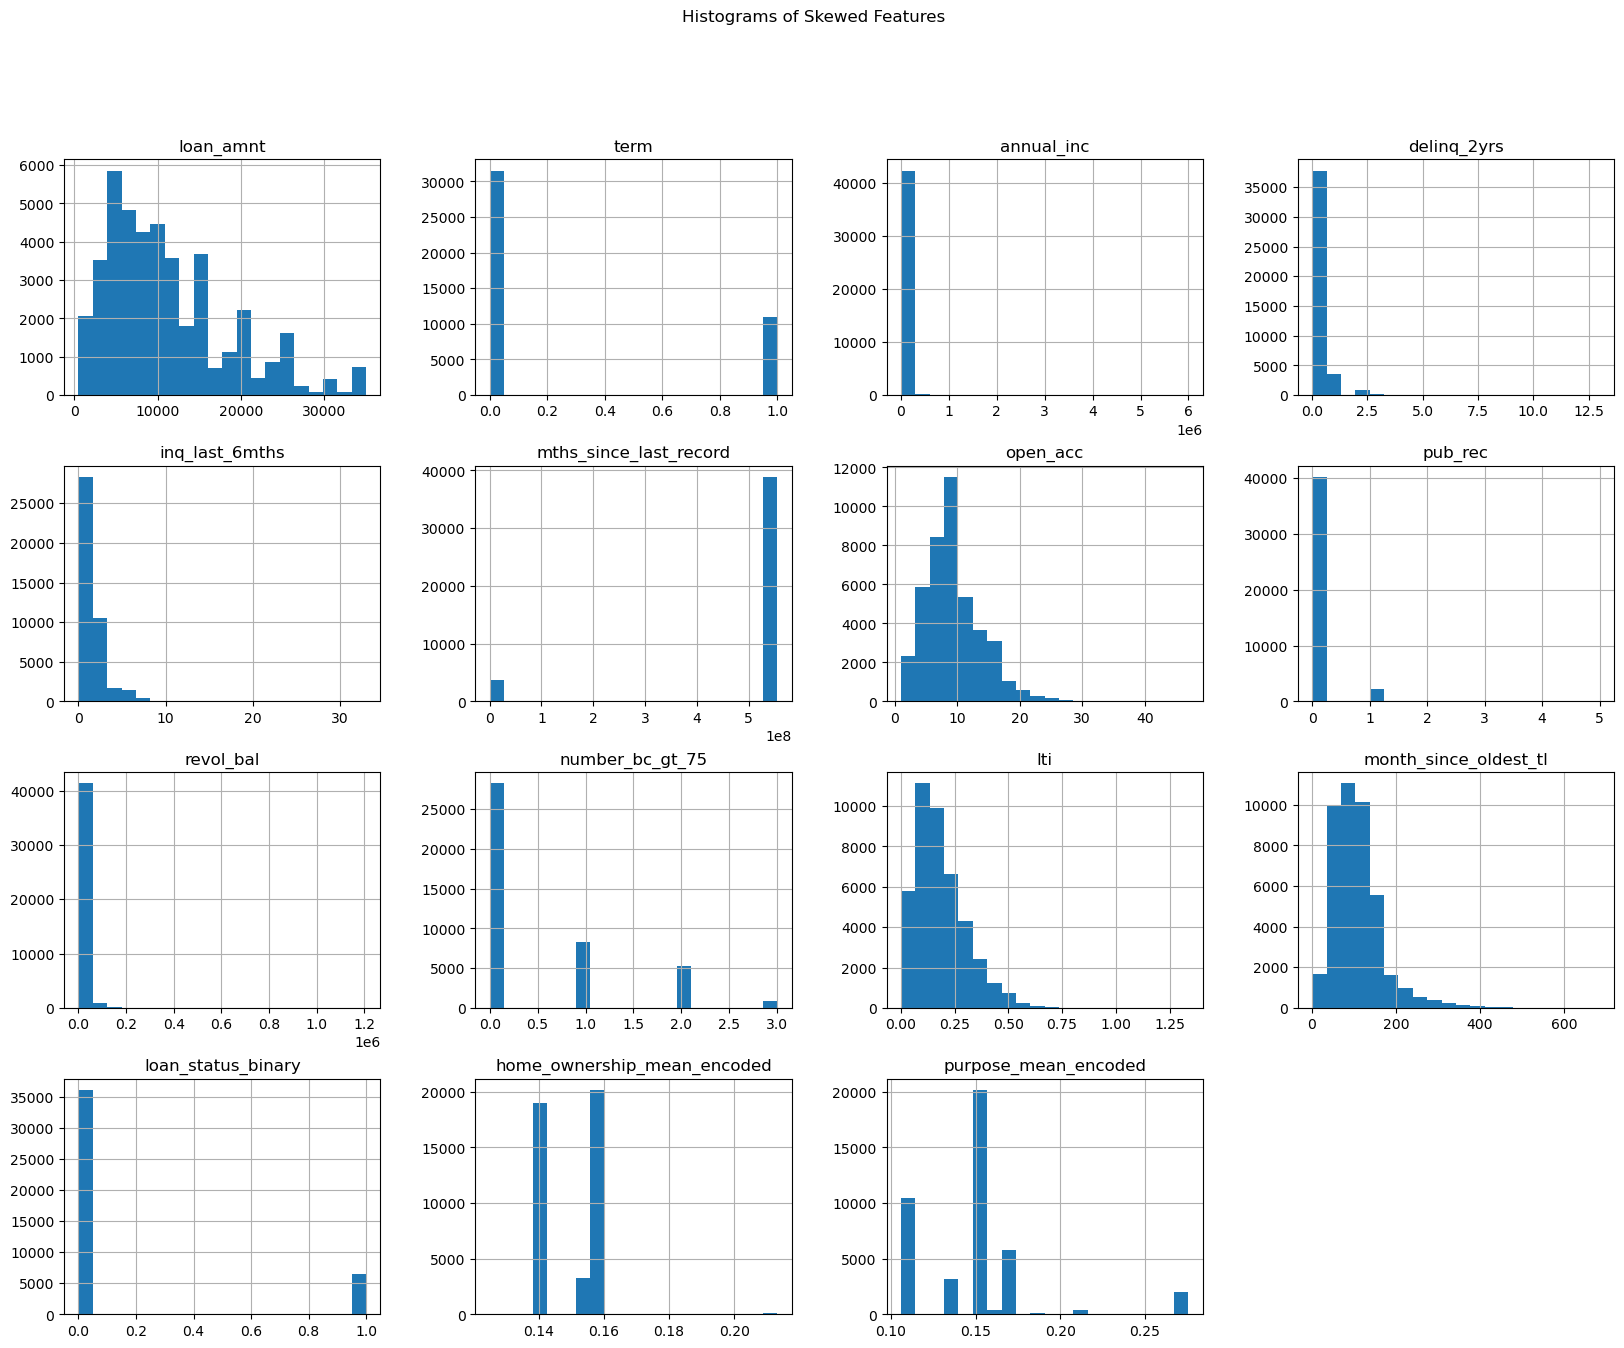

New Skewness after Log Transformation:
 loan_amnt                     -0.481090
term                           1.102458
annual_inc                     0.102662
delinq_2yrs                    3.101281
inq_last_6mths                 0.507797
mths_since_last_record        -3.041293
open_acc                      -0.235508
pub_rec                        4.023430
revol_bal                     -2.556705
number_bc_gt_75                0.998686
lti                            0.764277
month_since_oldest_tl         -0.920036
loan_status_binary             1.947165
home_ownership_mean_encoded    0.971391
purpose_mean_encoded           1.489517
dtype: float64


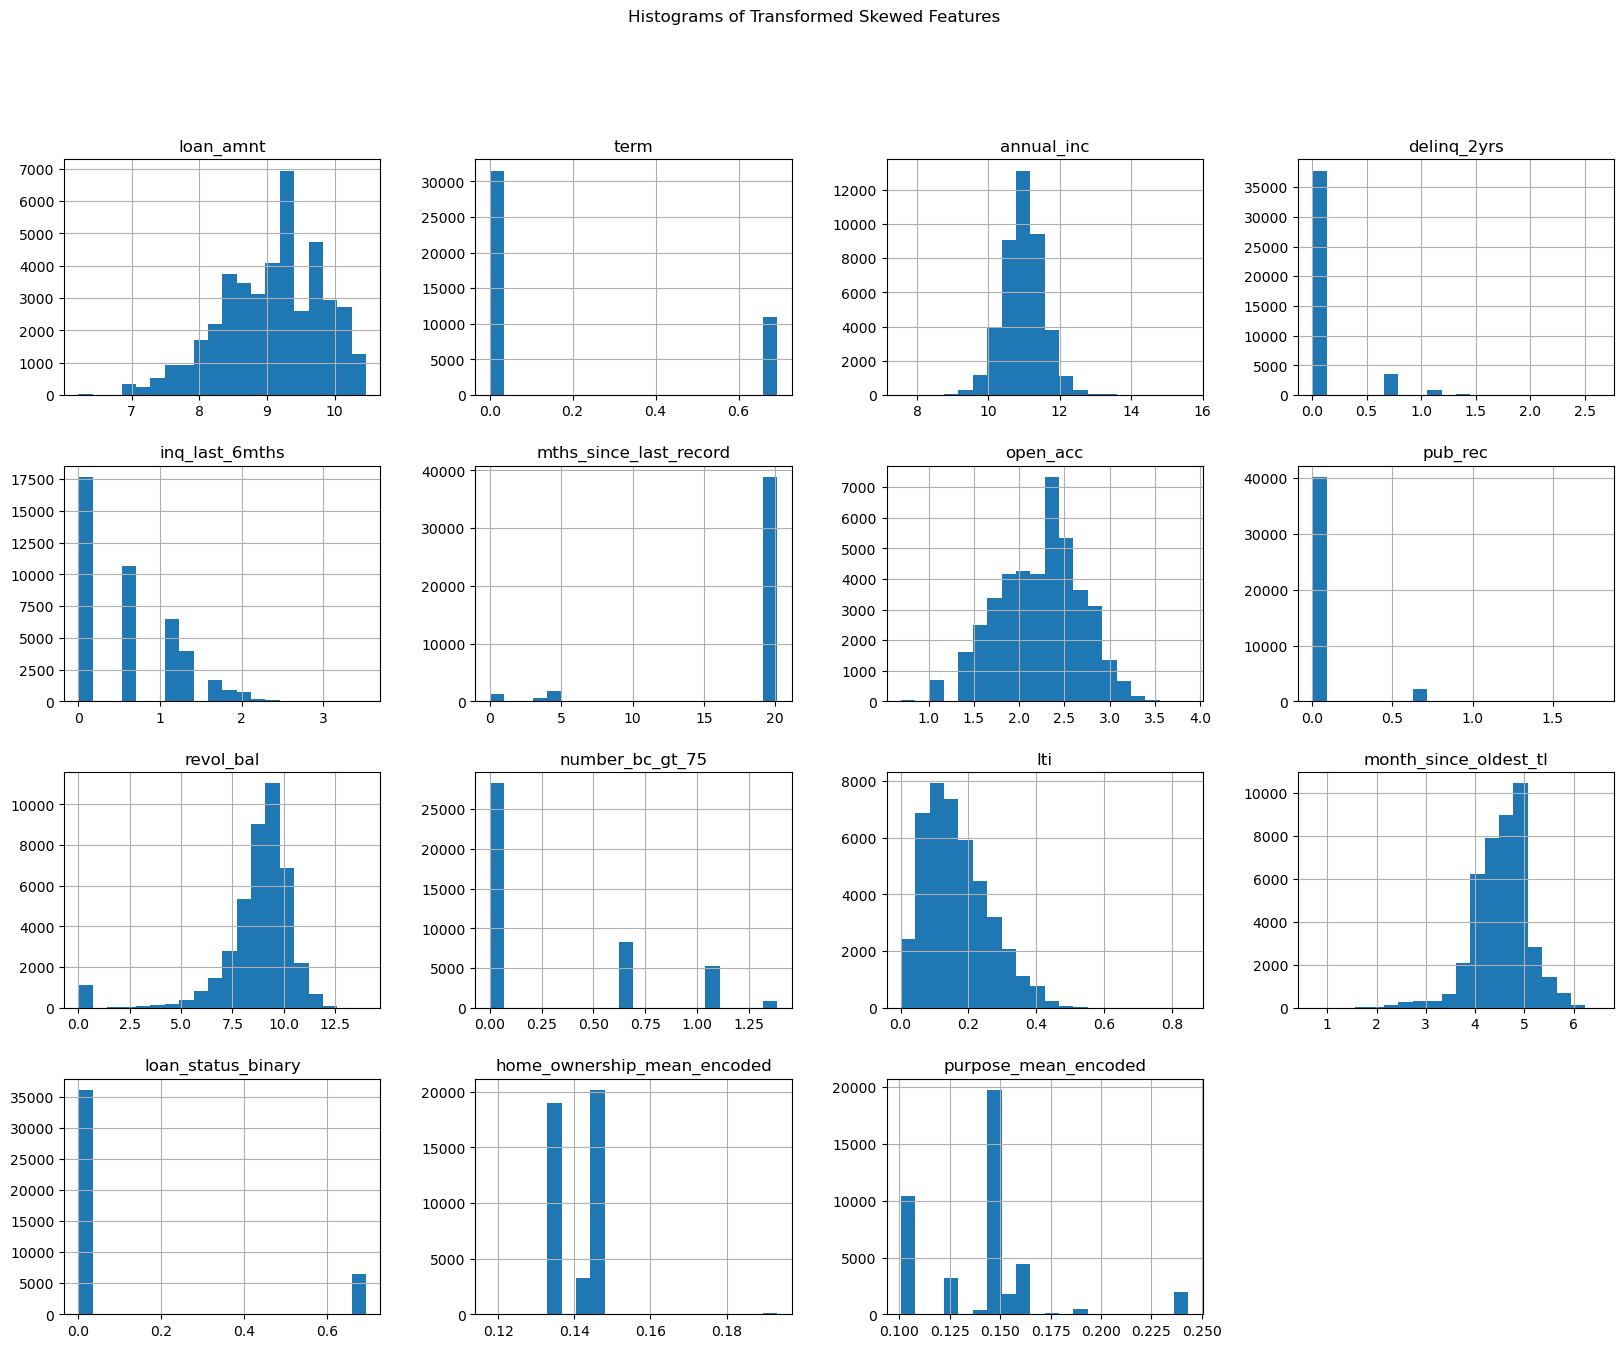

In [23]:
numeric_df = df.select_dtypes(include=[np.number])
skewness = numeric_df.skew()
print("Skewness of numeric features:\n", skewness)

skewed_features = skewness[skewness.abs() > 1].index
print("Skewed Features:\n", skewed_features)

numeric_df[skewed_features].hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Skewed Features')
plt.show()

numeric_df[skewed_features] = numeric_df[skewed_features].apply(lambda x: np.log1p(x + 1e-9))

new_skewness = numeric_df[skewed_features].skew()
print("New Skewness after Log Transformation:\n", new_skewness)

# Visualize distributions after transformation
numeric_df[skewed_features].hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Transformed Skewed Features')
plt.show()

## Feature Engineering

<Axes: >

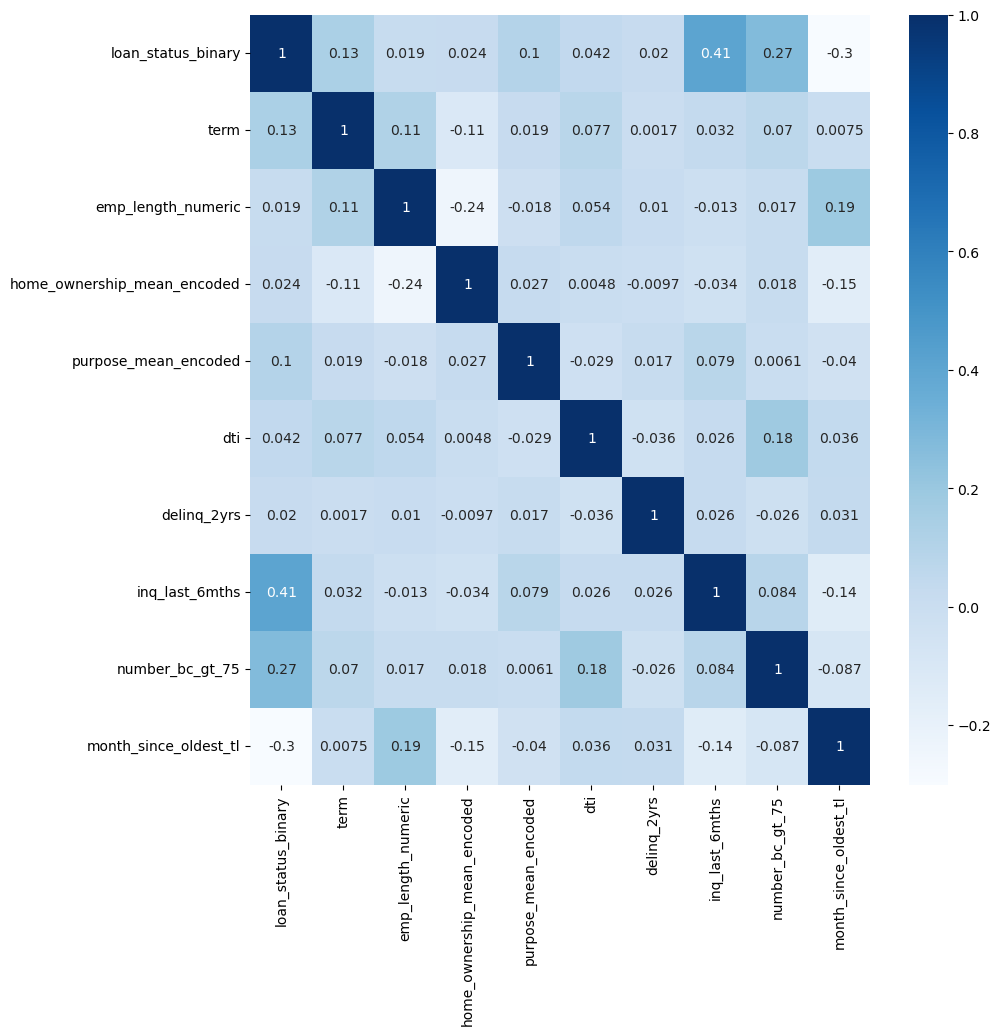

In [24]:
check_correlation = df[[
       'loan_status_binary',
       'term', 
       'emp_length_numeric', 
       'home_ownership_mean_encoded',
       'purpose_mean_encoded',
       'dti',
       'delinq_2yrs',
       'inq_last_6mths',
       'number_bc_gt_75',
       'month_since_oldest_tl',
]]

corr = check_correlation.corr(numeric_only = True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap = 'Blues')

                        mths_since_last_record   pub_rec  loan_status_binary
mths_since_last_record                1.000000 -0.772144           -0.075881
pub_rec                              -0.772144  1.000000            0.053751
loan_status_binary                   -0.075881  0.053751            1.000000


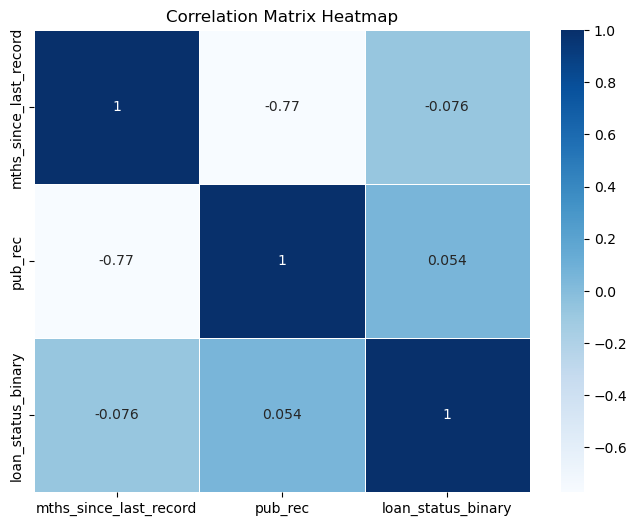

In [25]:
corr_matrix = df[[ 'mths_since_last_record', 'pub_rec', 'loan_status_binary']].corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

                    open_acc  loan_status_binary  total_acc
open_acc            1.000000           -0.005808   0.693161
loan_status_binary -0.005808            1.000000  -0.020922
total_acc           0.693161           -0.020922   1.000000


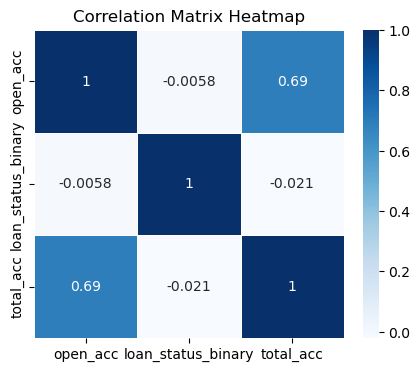

In [26]:
corr_matrix = df[['open_acc', 'loan_status_binary', 'total_acc']].corr()
print(corr_matrix)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

                    revol_bal  revol_utilization  loan_status_binary  \
revol_bal            1.000000           0.194222            0.017162   
revol_utilization    0.194222           1.000000            0.081037   
loan_status_binary   0.017162           0.081037            1.000000   
fico_score          -0.037425          -0.435646           -0.419335   

                    fico_score  
revol_bal            -0.037425  
revol_utilization    -0.435646  
loan_status_binary   -0.419335  
fico_score            1.000000  


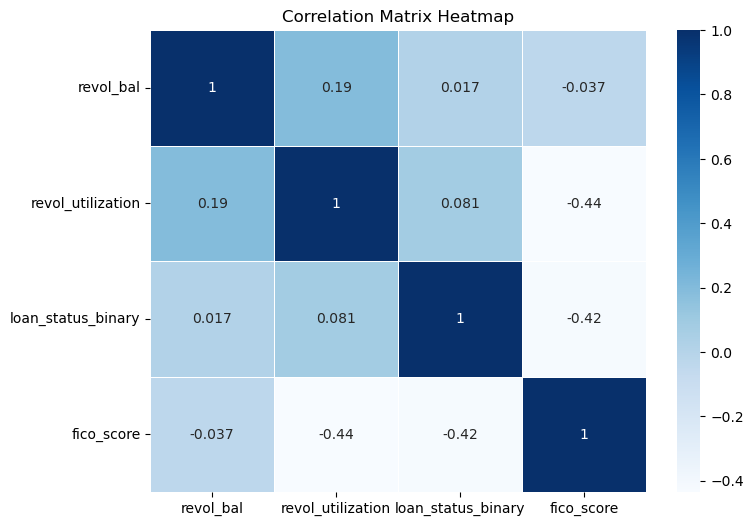

In [27]:
corr_matrix = df[['revol_bal', 'revol_utilization', 'loan_status_binary', 'fico_score']].corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

                    loan_amnt       lti  loan_status_binary  annual_inc
loan_amnt            1.000000  0.598773            0.042754    0.276126
lti                  0.598773  1.000000            0.099285   -0.238462
loan_status_binary   0.042754  0.099285            1.000000   -0.037920
annual_inc           0.276126 -0.238462           -0.037920    1.000000


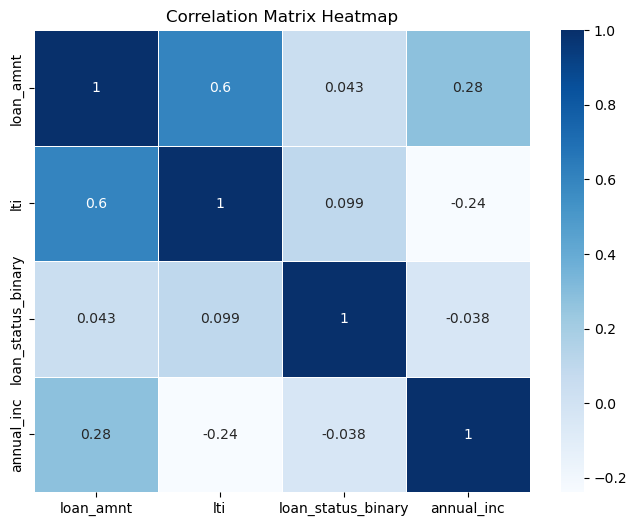

In [28]:
corr_matrix = df[['loan_amnt', 'lti', 'loan_status_binary', 'annual_inc']].corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

                    emp_length_numeric      term  loan_status_binary  \
emp_length_numeric            1.000000  0.111610            0.019350   
term                          0.111610  1.000000            0.133748   
loan_status_binary            0.019350  0.133748            1.000000   
annual_inc                    0.099014  0.043497           -0.037920   

                    annual_inc  
emp_length_numeric    0.099014  
term                  0.043497  
loan_status_binary   -0.037920  
annual_inc            1.000000  


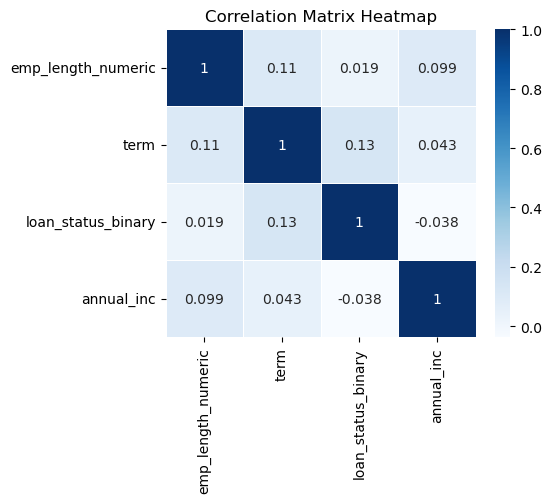

In [29]:
corr_matrix = df[['emp_length_numeric', 'term', 'loan_status_binary', 'annual_inc']].corr()
print(corr_matrix)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    42535 non-null  int64  
 1   term                         42535 non-null  int32  
 2   emp_length                   42535 non-null  object 
 3   home_ownership               42535 non-null  object 
 4   annual_inc                   42535 non-null  float64
 5   verification_status          42535 non-null  int32  
 6   loan_status                  42535 non-null  object 
 7   purpose                      42535 non-null  object 
 8   dti                          42535 non-null  float64
 9   delinq_2yrs                  42535 non-null  float64
 10  inq_last_6mths               42535 non-null  float64
 11  mths_since_last_record       42535 non-null  float64
 12  open_acc                     42535 non-null  float64
 13  pub_rec         

## Model Building

### Creating Independent and Dependent Features

In [31]:
x = df[[
#        'loan_amnt',
       'term', 
       'emp_length_numeric', 
       'home_ownership_mean_encoded',
#        'annual_inc', #- dicard due to high p value 0.2
#        'verification_status',
#        'purpose_mean_encoded',
       'dti',
       'delinq_2yrs',
       'inq_last_6mths',
#        'open_acc', 
       'pub_rec',
#        'revol_bal',
       'revol_utilization',
       'number_bc_gt_75',
       'fico_score',
       'month_since_oldest_tl',
#        'mths_since_last_record',
#        'total_acc', #- dicard due to high p value 0.2
       'lti'
]]

y = df['loan_status_binary']

# Features which can create implicit biases
gender = df['gender'];
race = df['race_name'];

In [32]:
x

,term,emp_length_numeric,home_ownership_mean_encoded,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_utilization,number_bc_gt_75,fico_score,month_since_oldest_tl,lti
0,1,1.0,0.158862,17.59,0.0,3.0,1.0,0.8730,2,709,124.0,0.147176
1,0,6.0,0.158862,7.80,0.0,2.0,0.0,0.3540,0,744,149.0,0.277778
2,1,9.0,0.142465,14.22,1.0,1.0,0.0,0.7540,0,719,176.0,0.156655
3,1,9.0,0.142465,20.35,0.0,1.0,0.0,0.3570,0,714,140.0,0.194444
4,1,0.5,0.158862,20.50,0.0,0.0,0.0,0.3690,0,709,136.0,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...
42530,0,3.0,0.142465,4.76,0.0,2.0,0.0,0.3180,0,674,19.0,0.333333
42531,0,5.0,0.158862,5.68,0.0,5.0,0.0,0.0087,0,679,16.0,0.213333
42532,0,3.0,0.158862,6.54,0.0,3.0,0.0,0.5270,2,689,17.0,0.060000
42533,1,4.0,0.158862,2.08,0.0,1.0,0.0,0.3340,0,749,55.0,0.210526


### Data Splitting

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import ks_2samp


In [34]:
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test, gender_train, gender_test, race_train, race_test = train_test_split(x, y, gender, race, test_size = 0.25, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Model Selection: Logistic Regression

In [47]:
x_train_sm = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_train_sm)
result = logit_model.fit(method='newton', maxiter=10000)

model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_train_pred = model1.predict_proba(x_train)[:, 1]
y_test_pred = model1.predict_proba(x_test)[:, 1]
y_pred = model1.predict(x_test)

print(result.summary())

vif_mat = result.model.exog
vif = pd.Series([variance_inflation_factor(vif_mat, i) for i in range(vif_mat.shape[1])], index=x_train_sm.columns)
vif = vif.drop('const')
print("VIF:\n", vif)


logreg = LogisticRegression(max_iter=10000)
scores = cross_val_score(logreg, x, y, cv=5, scoring='roc_auc')  # Use 5-fold cross-validation

# Print cross-validation scores
print("\nCross-validation ROC AUC scores:", scores)
print("\nMean ROC AUC score:", scores.mean()*100)

Optimization terminated successfully.
         Current function value: 0.209364
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     loan_status_binary   No. Observations:                31901
Model:                          Logit   Df Residuals:                    31888
Method:                           MLE   Df Model:                           12
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                  0.5066
Time:                        23:25:14   Log-Likelihood:                -6678.9
converged:                       True   LL-Null:                       -13537.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          46.8766      1.104     42.470      0.000   

### Model Evaluation

In [48]:
y_train_pred_prob = result.predict(x_train_sm)
y_test_pred_prob = result.predict(sm.add_constant(x_test))

# Compute ROC curve and ROC AUC score for training and test datasets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)

# Compute KS statistic and p-value for training and test datasets
ks_statistic_train, p_value_train = ks_2samp(y_train_pred_prob[y_train == 1], y_train_pred_prob[y_train == 0])
ks_statistic_test, p_value_test = ks_2samp(y_test_pred_prob[y_test == 1], y_test_pred_prob[y_test == 0])

print("ROC AUC Score (Training):", roc_auc_train)
print("KS Statistic (Training):", ks_statistic_train)
print("P-value (Training):", p_value_train)

print("ROC AUC Score (Test):", roc_auc_test)
print("KS Statistic (Test):", ks_statistic_test)
print("P-value (Test):", p_value_test)

ROC AUC Score (Training): 0.9315853913717692
KS Statistic (Training): 0.7373866203176237
P-value (Training): 0.0
ROC AUC Score (Test): 0.9281286793604796
KS Statistic (Test): 0.7325626047247112
P-value (Test): 1.724e-321


### Checking implicit biases in the model

In [49]:
# Disparate impact Analysis

def disparate_impact(y_pred, protected_attribute, group_a, group_b):
    group_a_mask = (protected_attribute == group_a)
    group_b_mask = (protected_attribute == group_b)
    
    approval_rate_a = np.mean(y_pred[group_a_mask])
    approval_rate_b = np.mean(y_pred[group_b_mask])
    
    disparate_impact_ratio = approval_rate_a / approval_rate_b
    return approval_rate_a, approval_rate_b, disparate_impact_ratio

# Disparate Impact for Gender
group_a_gender = 1  #protected group:- Females
group_b_gender = 0  #reference group:- Male

approval_rate_a_gender, approval_rate_b_gender, di_ratio_gender = disparate_impact(y_pred, gender_test, group_a_gender, group_b_gender)


print(f'Approval Rate for Females: {approval_rate_a_gender}')
print(f'Approval Rate for Males: {approval_rate_b_gender}')
print(f'Disparate Impact Ratio (Gender): {di_ratio_gender}')

if di_ratio_gender < 0.8:
    print("Potential disparate impact detected (Gender).")
else:
    print("No disparate impact detected (Gender).")

Approval Rate for Females: 0.08945260347129506
Approval Rate for Males: 0.09831200148395473
Disparate Impact Ratio (Gender): 0.9098848779504749
No disparate impact detected (Gender).


In [50]:
# Disparate Impact for Race
group_a_race = 'Asian'  #protected group
group_b_race = 'African American' #protected group
group_c_race = 'Other' #protected group
group_d_race = 'White'  #Since "White" is the majority group, it will be taken as reference

approval_rate_a_race, approval_rate_d_race, di_ratio_race_a = disparate_impact(y_pred, race_test, group_a_race, group_d_race)
approval_rate_b_race, approval_rate_d_race, di_ratio_race_b = disparate_impact(y_pred, race_test, group_b_race, group_d_race)
approval_rate_c_race, approval_rate_d_race, di_ratio_race_c = disparate_impact(y_pred, race_test, group_c_race, group_d_race)

print(f'Approval Rate for Minority Race - Asian: {approval_rate_a_race}')
print(f'Approval Rate for Minority Race - African American: {approval_rate_b_race}')
print(f'Approval Rate for Minority Race - Other: {approval_rate_c_race}')
print(f'Approval Rate for Majority Race: {approval_rate_d_race}')
print('\n')

print(f'Disparate Impact Ratio (Asian): {di_ratio_race_a}')
if di_ratio_race_a < 0.8:
    print("Potential disparate impact detected (Asian).")
else:
    print("No disparate impact detected (Asian).")
print('\n')

print(f'Disparate Impact Ratio (African American): {di_ratio_race_b}')
if di_ratio_race_b < 0.8:
    print("Potential disparate impact detected (African American).")
else:
    print("No disparate impact detected (African American).")
print('\n')
    
print(f'Disparate Impact Ratio (Other Races): {di_ratio_race_c}')
if di_ratio_race_c < 0.8:
    print("Potential disparate impact detected (Other Races).")
else:
    print("No disparate impact detected (Other Races).")
print('\n') 

# White               14160
# Asian               14149
# African American     7118
# Other                7108

Approval Rate for Minority Race - Asian: 0.09639588100686498
Approval Rate for Minority Race - African American: 0.09599096555618294
Approval Rate for Minority Race - Other: 0.08997134670487106
Approval Rate for Majority Race: 0.0924903368304804


Disparate Impact Ratio (Asian): 1.0422265104682535
No disparate impact detected (Asian).


Disparate Impact Ratio (African American): 1.0378485887895361
No disparate impact detected (African American).


Disparate Impact Ratio (Other Races): 0.972764829149382
No disparate impact detected (Other Races).


